In [6]:
from manim import *
from pathlib import Path
import shutil
import time
import json

params = " -v WARNING -r 80,40 -s  --disable_caching Example"

#def latest_file(path: Path, pattern: str = "*"):
#   files = path.glob(pattern)
#   return max(files, key=lambda x: x.stat().st_ctime)

def save_image(name):
    #from_file = latest_file(Path("./media/images/mobject-gallery"))
    from_file = Path("./media/images/mobject-gallery/Example_ManimCE_v0.10.0.png")
    to_file = Path.cwd() / name
    shutil.copy(from_file, to_file)
    
name_snippet_pairs = {}

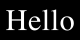

In [7]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Text("Hello", color=WHITE)
        self.add(mob)
        self.camera.frame.scale(1/8)
###******        
category = "text"
image_file_name = "Text.png"
snippet = 'mob = Text("Hello", color=WHITE)'
image_full_name = category + "_" + image_file_name
name_snippet_pairs[image_full_name] = snippet

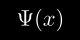

In [8]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = MathTex(r"\Psi(x)", color=WHITE)
        self.add(mob)
        self.camera.frame.scale(1/8)
###******        
category = "text"
image_file_name = "MathTex.png"
snippet = 'mob = MathTex(r"\Psi(x)", color=WHITE)'
image_full_name = category + "_" + image_file_name
name_snippet_pairs[image_full_name] = snippet

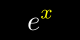

In [19]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = MathTex(r"e^x",substrings_to_isolate="x")
        mob.set_color_by_tex("x", YELLOW)
        self.add(mob)
        self.camera.frame.scale(1/10)
###******        
category = "text"
image_file_name = "MathTex.png"
snippet = 'mob = MathTex(r"e^x",substrings_to_isolate="x") \nmob.set_color_by_tex("x", YELLOW)'

image_full_name = category + "_" + image_file_name
name_snippet_pairs[image_full_name] = snippet

# Save here!

In [20]:
!rm -r Mobjects_Text_files

In [21]:
!jupyter nbconvert Mobjects_Text.ipynb --to markdown

[NbConvertApp] Converting notebook Mobjects_Text.ipynb to markdown
[NbConvertApp] Support files will be in Mobjects_Text_files/
[NbConvertApp] Making directory Mobjects_Text_files
[NbConvertApp] Making directory Mobjects_Text_files
[NbConvertApp] Making directory Mobjects_Text_files
[NbConvertApp] Writing 3813 bytes to Mobjects_Text.md


In [22]:
!rm -r Mobjects_Text.md

In [23]:
base_directory = Path.cwd() / "Mobjects_Text_files"
target_directory = Path.cwd() / "images"
import os
paths = sorted(Path(base_directory).iterdir(), key=os.path.getmtime)
dest_names = list(name_snippet_pairs.keys())
new_keys = []
for num, (p,des) in enumerate(zip(paths,dest_names)):
    to_path = target_directory /  f"image{num:03}{des}"   
    shutil.copy(p,  to_path)
#    print("done", to_path.name)
    new_keys.append(to_path.name)

In [24]:
!rm -r Mobjects_Basics_files

rm: Mobjects_Basics_files: No such file or directory


In [25]:
new_name_snippet_pairs ={} 
new_values = list(name_snippet_pairs.values())
#new_new_values = []
#for val in new_values:
#    val= val.replace('"', "'")
#    print(val)
for key, value in zip(new_keys,new_values):
    new_name_snippet_pairs[key]=value

In [26]:
new_name_snippet_pairs

{'image000text_Text.png': 'mob = Text("Hello", color=WHITE)',
 'image001text_MathTex.png': 'mob = MathTex(r"e^x",substrings_to_isolate="x") \nmob.set_color_by_tex("x", YELLOW)'}

In [27]:
with open('name_snippet_pairs_text.json', 'w') as fp:
    json.dump(new_name_snippet_pairs, fp,indent=2)

In [18]:
!git add .